Pseudocode:
for participant in participants:
    load testset (== 1 participant)
    y = class
    y^ = shuffle(class)
    f1 = f1(y, y^)
end

In [41]:
%load_ext autoreload
%autoreload 2

import xarray as xr
from pathlib import Path
import numpy as np
from hmpai.data import preprocess
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data = xr.load_dataset("../data/sat1/split_stage_data_100hz.nc")

In [3]:
preprocessed = preprocess(data)

In [38]:
# Amount of times to shuffle
n = 1000
macro_f1 = []
weighted_f1 = []
for participant in tqdm(data.participant.values):
    participant_data = data.sel(participant=participant)
    participant_data = preprocess(participant_data, for_ica=True)
    true = participant_data.labels.values
    shuffled = np.copy(true)
    for i in range(n):
        np.random.shuffle(shuffled)
        result = classification_report(true, shuffled, output_dict=True)
        macro_f1.append(result['macro avg']['f1-score'])
        weighted_f1.append(result['weighted avg']['f1-score'])
    # print(shuffled)

  0%|          | 0/25 [00:00<?, ?it/s]

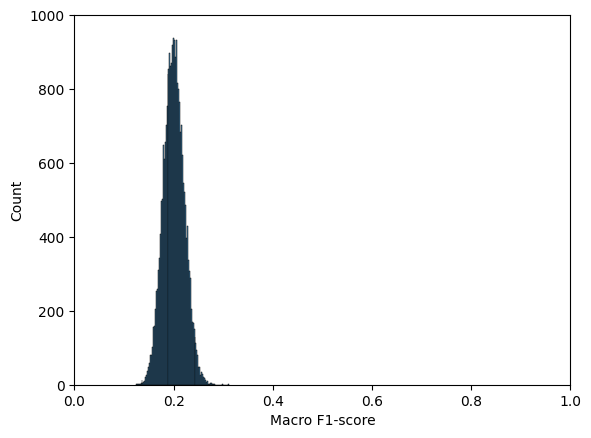

In [45]:
sns.histplot(macro_f1)
plt.xlabel('Macro F1-score')
plt.ylim(0, 1000)
plt.xlim(0, 1)
plt.plot();

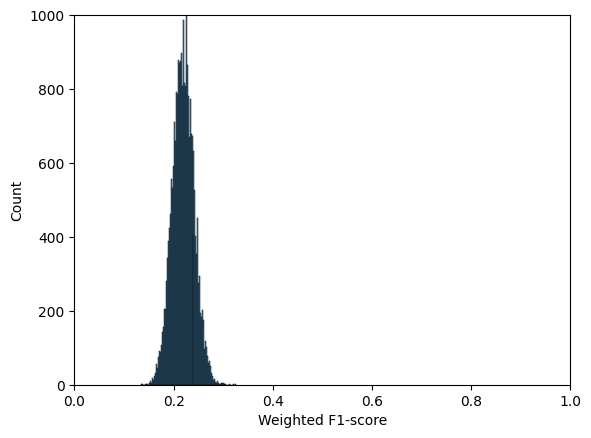

In [46]:
sns.histplot(weighted_f1)
plt.xlabel('Weighted F1-score')
plt.ylim(0, 1000)
plt.xlim(0, 1)
plt.plot();